In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Breast Cancer Winscoin.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.drop(['id',"Unnamed: 32"],axis = 1,inplace = True)

In [4]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
df.shape

(569, 31)

In [6]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
df['diagnosis'] = lab_enc.fit_transform(df['diagnosis'])

In [7]:
X = df.drop('diagnosis',axis = 1)
y = df['diagnosis']

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_model = LogisticRegression()

param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga','sag'],
         "max_iter" : [10,100,1000] # Solvers compatible with l1 and l2
    }

grid_cv = GridSearchCV(estimator=log_model,
                       param_grid=param_grid,
                       cv = 5,scoring='accuracy')

In [10]:
model = grid_cv.fit(X_train,y_train)

In [11]:
model.best_estimator_

LogisticRegression(C=100, penalty='l1', solver='liblinear')

In [12]:
y_pred = model.predict(X_test)
y_pred[:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test,y_pred))

0.9590643274853801


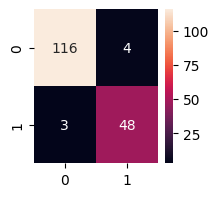

In [14]:
cm = confusion_matrix(y_test,y_pred,)
plt.figure(figsize=(2,2))
sns.heatmap(cm,annot=True,fmt = 'd')
plt.show()

In [15]:
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))

0.9590643274853801
0.9899497487437185


# Randomized Search CV

In [16]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga','sag'],
         "max_iter" : [10,100,1000] # Solvers compatible with l1 and l2
    }
random_scv = RandomizedSearchCV(estimator=log_model,
                                param_distributions = param_grid,
                                n_iter=10,
                                )

random_model = random_scv.fit(X_train,y_train)
random_model

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'max_iter': [10, 100, 1000],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga', 'sag']})

In [17]:
y_pred_random = random_model.predict(X_test)
y_pred_random[:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [18]:
accuracy_score(y_test,y_pred_random)

0.9590643274853801

In [19]:
print(random_model.score(X_test,y_test))
print(random_model.score(X_train,y_train))

0.9590643274853801
0.9899497487437185
